In [1]:
import os
import numpy as np
from skimage.transform import resize, rescale
from skimage.io import imread, imsave, imread_collection
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# imgs = imread_collection('../data/icons/*.png')
icons_dir = '/Users/universome/Downloads/custom-icons/original'
imgs = [imread(f'{icons_dir}/{f}') for f in os.listdir(f'{icons_dir}') if not f.startswith('.')]


def to_binary(img, threshold:float=0):
    return (img > threshold).astype(np.uint8) * 255
    
    
def downscale_to_fit(img, max_size):
    "Rescales image such that its max width/height is max_size"
    target_scale = max_size / max(img.shape)
    result = rescale(img, target_scale, multichannel=False)
    
    return result

In [3]:
processed = [None] * len(imgs)
processed[0] = ((imgs[1] > 100) * 255).astype(np.uint8)
processed[1] = imgs[0][:, :, 3]
processed[2] = ((imgs[2] > 200) * 255).astype(np.uint8)
processed[3] = ((imgs[3][:, :, 3] < 250) * 255).astype(np.uint8)
processed[4] = ((imgs[4][:, :, 3] < 250) * 255).astype(np.uint8)

In [4]:
# imsave('/Users/universome/Downloads/custom-icons/processed/mona-lisa.png', processed[0])
# imsave('/Users/universome/Downloads/custom-icons/processed/batman-logo-1.png', processed[1])
# imsave('/Users/universome/Downloads/custom-icons/processed/goose.png', processed[2])
# imsave('/Users/universome/Downloads/custom-icons/processed/putin.png', processed[3])
# imsave('/Users/universome/Downloads/custom-icons/processed/batman-logo-2.png', processed[4])

In [5]:
resized = [None] * len(imgs)
resized[0] = to_binary(downscale_to_fit(processed[0], 100), 0.6)
resized[1] = to_binary(downscale_to_fit(processed[1], 100), 0.6)
resized[2] = to_binary(downscale_to_fit(processed[2], 100), 0.7)
resized[3] = to_binary(downscale_to_fit(processed[3], 100), 0.6)
resized[4] = to_binary(downscale_to_fit(processed[4], 100), 0.)

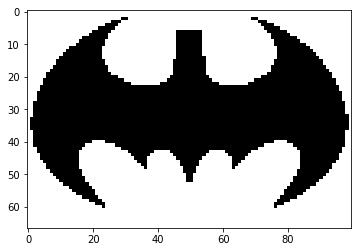

In [6]:
i = 4
threshold = 0.
plt.imshow(to_binary(downscale_to_fit(processed[i], 100), threshold), cmap='gray');

In [7]:
imsave('/Users/universome/Downloads/custom-icons/resized/mona-lisa.png', resized[0])
imsave('/Users/universome/Downloads/custom-icons/resized/batman-logo-1.png', resized[1])
imsave('/Users/universome/Downloads/custom-icons/resized/goose.png', resized[2])
imsave('/Users/universome/Downloads/custom-icons/resized/putin.png', resized[3])
imsave('/Users/universome/Downloads/custom-icons/resized/batman-logo-2.png', resized[4])

In [8]:
import os

size_name = f'{target_size[0]}x{target_size[1]}'
os.makedirs(f'../data/icons-resized/{size_name}', exist_ok=True)

for img, filename in zip(imgs, imgs.files):
    result = to_binary(resize(img, target_size, mode='constant'))
    imsave(f'../data/icons-resized/{size_name}/{os.path.basename(filename)}', result)

NameError: name 'target_size' is not defined

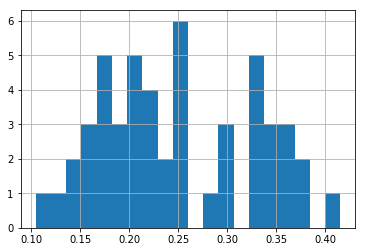

In [6]:
resized = [to_binary(resize(img, target_size, mode='constant')) for img in imgs]
num_whites = [(x > 0).sum() / x.size for x in resized]

plt.hist(num_whites, bins=20);
plt.grid()